# **1. Importing the tools**

In [70]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt


# **2. Looading Dataset**

In [71]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **3. Data Preprocessing**


In [72]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.drop(columns=['CustomerID'], inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


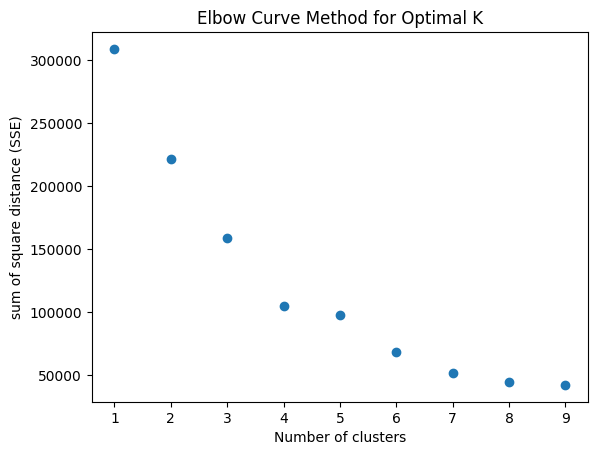

In [75]:
sse = []
k_range = range(1,10)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit_predict(df)
  sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.scatter(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sum of square distance (SSE)')
plt.title('Elbow Curve Method for Optimal K')
plt.show()

# **4. Apply K-means with 3 cluster**

In [76]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
df['cluster'] = kmeans.fit_predict(df)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,2


# **5. Generate cluster Names**

In [77]:
cluster_labels = {
    0: 'Low income - low spending',
    1: 'High income - High spending',
    2: 'Young Low income - High spending'
}

df['segments'] = df['cluster'].map(cluster_labels)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,segments
0,1,19,15,39,2,Young Low income - High spending
1,1,21,15,81,2,Young Low income - High spending
2,0,20,16,6,0,Low income - low spending
3,0,23,16,77,2,Young Low income - High spending
4,0,31,17,40,2,Young Low income - High spending


# **6. Visualizing the Clusters**

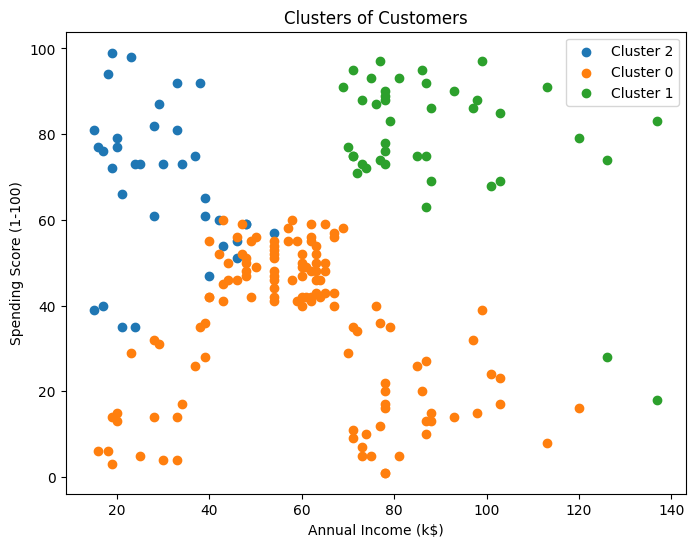

In [78]:
plt.figure(figsize=(8,6))

for i in df['cluster'].unique():
  clustered = df[df['cluster']==i]
  plt.scatter(clustered['Annual Income (k$)'], clustered['Spending Score (1-100)'], label=f'Cluster {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

# **7. Evalute K-means Model**

In [79]:
# using the silhoutte score (measures how a similar point is to its own cluster compared to other clusteres)
features = df [['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

silhouette_avg = silhouette_score(features, df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.34


# **7. Save and load trained kmeans**

In [80]:
import pickle
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

kmeans = pickle.load(open('kmeans.pkl', 'rb'))

# **8. Real time customer segmentation function**

In [81]:
# Function to predict customer segment
def predict_customer_segment(gender, age, income, spending_score):
  # Prepare input as a Numpy array
  new_data = np.array([[gender, age, income, spending_score]])

  # Predict cluster
  cluster = kmeans.predict(new_data)[0]

  # Map to segment
  segment = cluster_labels.get(cluster, 'unknown clusters')

  # Printing the result
  print(f"Predicted cluster: {cluster}")
  print(f"Customer segment: {segment}")

In [82]:
# exmaple uses

predict_customer_segment(gender=1, age=32, income=30, spending_score=63)

Predicted cluster: 2
Customer segment: Young Low income - High spending


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [83]:
# exmaple uses

predict_customer_segment(gender=0, age=25, income=30, spending_score=63)

Predicted cluster: 2
Customer segment: Young Low income - High spending


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
